<a href="https://colab.research.google.com/github/klokesh656/Self-Guided-DS-Projects-/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install quandl

In [2]:
import quandl
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


In [3]:
df=quandl.get("WIKI/FB")
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0,1.0,164.80,173.40,163.30,169.39,105350867.0
2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0
2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0
2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0
2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0


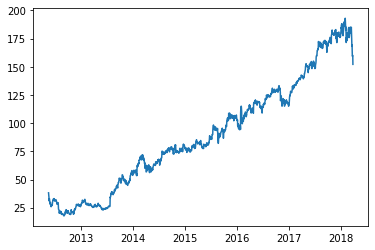

In [4]:
df=df[['Adj. Close']]
df.head()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df) 

In [5]:
forecast_days = 30
df['prediction'] = df['Adj. Close'].shift(-forecast_days)
df.tail()

,Adj. Close,prediction
Date,,
2018-03-21,169.39,NaN
2018-03-22,164.89,NaN
2018-03-23,159.39,NaN
2018-03-26,160.06,NaN
2018-03-27,152.19,NaN


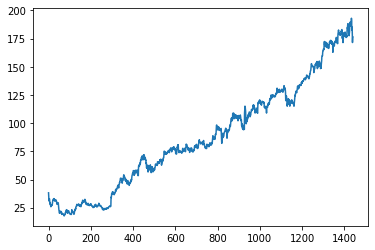

In [6]:
#create the independent data set(x)
#convert dataframe to numpy array
x=np.array(df.drop(['prediction'],1))
x=x[:-forecast_days]
plt.plot(x)


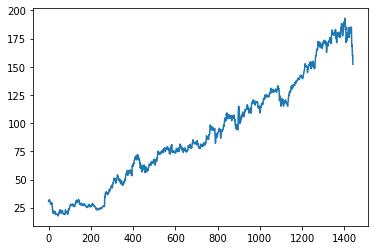

In [7]:
#create a dependent data set(y)
#convert the dataframe to numpy array (all value including nan)
y= np.array(df['prediction'])
y = y[:-forecast_days]
plt.plot(y)

In [8]:
#split the data into 80% training and 20% testing
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [9]:
#create and train the support vector machine(Regressor)
svr_rbf = SVR(kernel= 'rbf',C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [10]:
#Testing model : score rerturns the coeffiecient of determination r^2 of the prediction
#the bes tpossible score is 1..0
svm_cnfidence = svr_rbf.score(x_test,y_test)



svm confidence 0.9821532638349091


In [11]:
lr= LinearRegression()
lr.fit(x_train, y_train)
lr_confidence = lr.score(x_test,y_test)




lr confidence:  0.9814646491064125


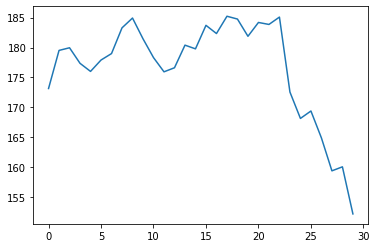

In [12]:
#set forecast equal to the last 30 rows of the original data set frm adj.clsoe column
x_forecast = np.array(df.drop(['prediction'],1))[-forecast_days:]
plt.plot(x_forecast)

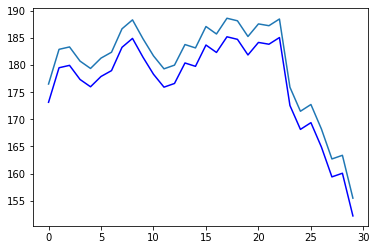

In [13]:
lr_prediction =lr.predict(x_forecast)
plt.plot(x_forecast, color='b')
plt.plot(lr_prediction)

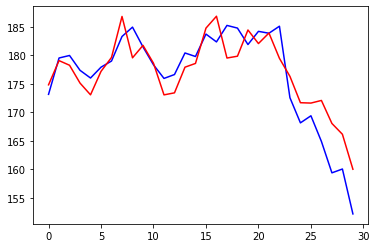

In [25]:
svm_prediction = svr_rbf.predict(x_forecast)
plt.plot(x_forecast, color='b')
plt.plot(svm_prediction, color='r')

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
rf= RandomForestRegressor()
rf_prediction = rf.fit(x_train,y_train)
rf_cnfidence = rf_prediction.score(x_test,y_test)

In [24]:
print("linear regression confidence: ", lr_confidence)
print("svm confidence",  svm_cnfidence)
print("random forest confidence",  rf_cnfidence)

linear regression confidence:  0.9814646491064125
svm confidence 0.9821532638349091
random forest confidence 0.9824288586072641
